In [58]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer, KNNImputer

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'train2.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
train = pd.read_csv(file_content_stream)
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
# Frequency table of failures
train['product_code'].value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

<AxesSubplot: xlabel='measurement_4', ylabel='Count'>

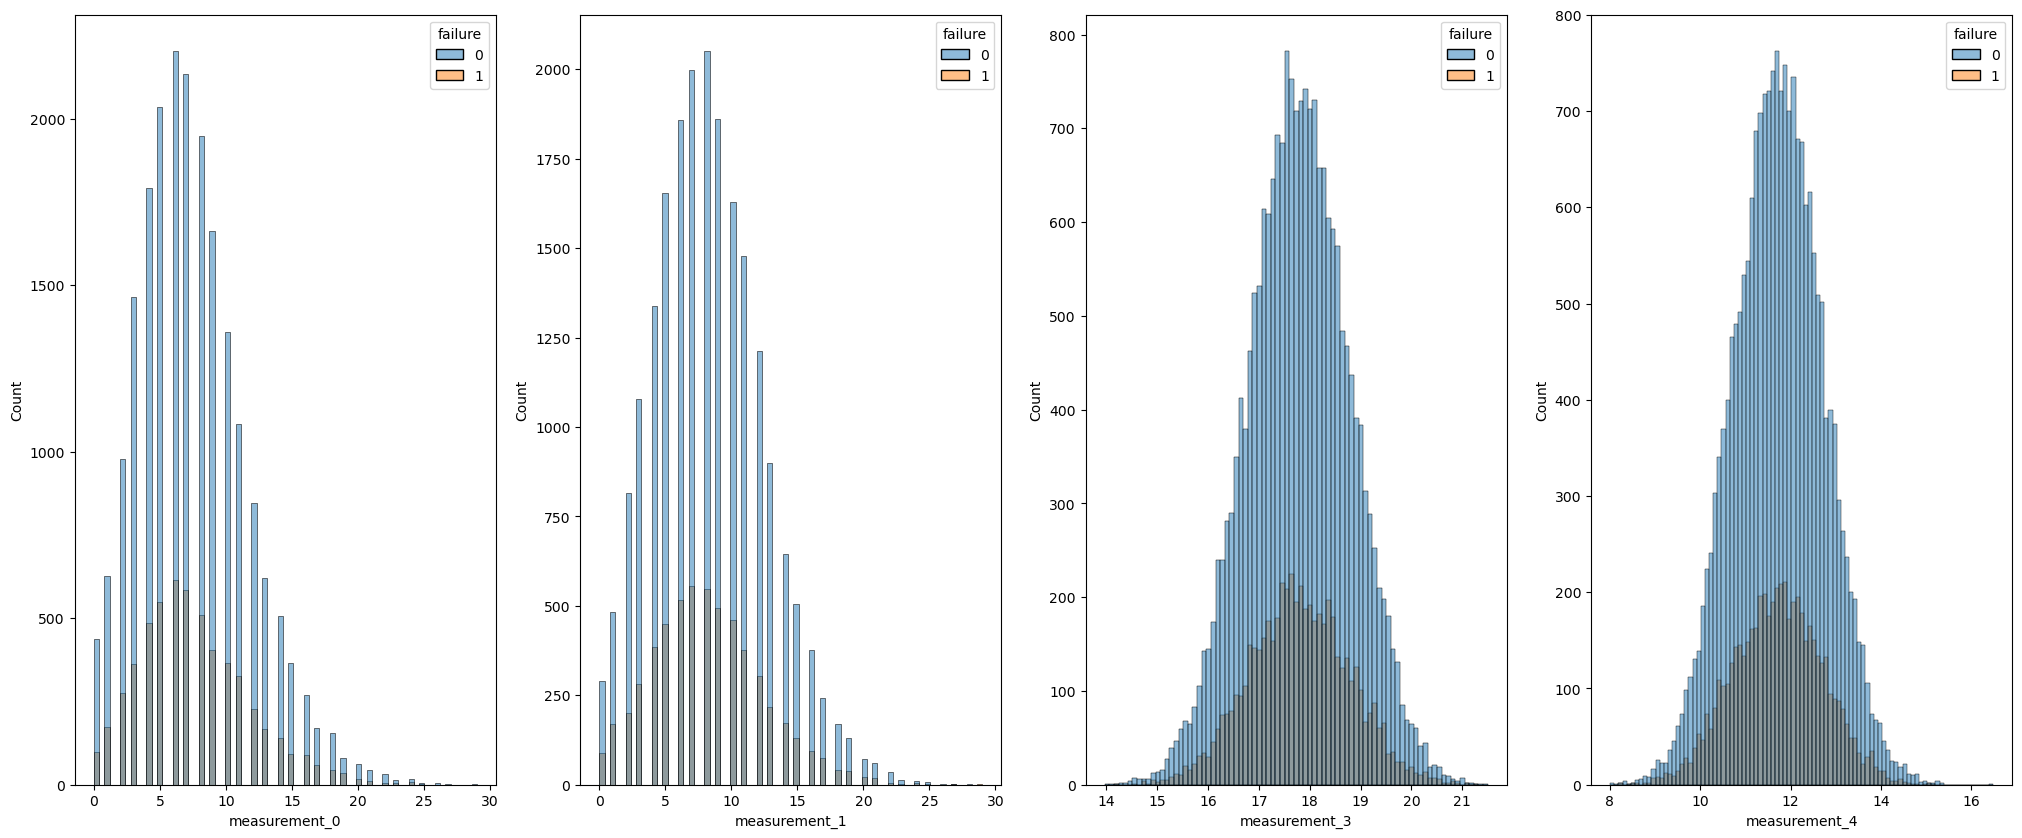

In [27]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize = (25, 10))
sns.histplot(ax = axes[0], x = 'measurement_0', hue ='failure', data = train)
sns.histplot(ax = axes[1], x = 'measurement_1', hue ='failure', data = train)
sns.histplot(ax = axes[2], x = 'measurement_3', hue ='failure', data = train)
sns.histplot(ax = axes[3], x = 'measurement_4', hue ='failure', data = train)

In [ ]:
# from the histograms below we can see measurements 0 and 1 are slightly right skewed and measurments 3 and 4 are normally distributed. this distribution is
# consistent for all other measurements > 4

In [80]:
# defining input and target
x = train.drop(columns = ['failure', 'attribute_0', 'attribute_1'], axis = 1)
y = train['failure']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [81]:
x_train_i = x_train.drop(columns = 'product_code')
x_test_i = x_test.drop(columns = 'product_code')
# defining imputer
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_i)

# imputing missing values
x_train_imp = pd.DataFrame(imputer.transform(x_train_i), columns = x_train_i.columns)
x_test_imp = pd.DataFrame(imputer.transform(x_test_i), columns = x_test_i.columns)

In [82]:
# Random Forest model
rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 5).fit(x_train_imp, y_train)

# predicting on test
rf_pred = rf_md.predict_proba(x_test_imp)[:,1]

print(roc_auc_score(y_test, rf_pred))

0.5937653344388231


In [83]:
# splitting data based on prodect code
x_train_code_a = x_train[x_train['product_code'] == 'A']
x_test_code_a = x_test[x_test['product_code'] == 'A']
y_train_code_a = y_train.loc[x_train['product_code'] == 'A']
y_test_code_a = y_test.loc[x_test['product_code'] == 'A']

x_train_code_b = x_train[x_train['product_code'] == 'B']
x_test_code_b = x_test[x_test['product_code'] == 'B']
y_train_code_b = y_train.loc[x_train['product_code'] == 'B']
y_test_code_b = y_test.loc[x_test['product_code'] == 'B']

x_train_code_c = x_train[x_train['product_code'] == 'C']
x_test_code_c = x_test[x_test['product_code'] == 'C']
y_train_code_c = y_train.loc[x_train['product_code'] == 'C']
y_test_code_c = y_test.loc[x_test['product_code'] == 'C']

x_train_code_d = x_train[x_train['product_code'] == 'D']
x_test_code_d = x_test[x_test['product_code'] == 'D']
y_train_code_d = y_train.loc[x_train['product_code'] == 'D']
y_test_code_d = y_test.loc[x_test['product_code'] == 'D']

x_train_code_e = x_train[x_train['product_code'] == 'E']
x_test_code_e = x_test[x_test['product_code'] == 'E']
y_train_code_e = y_train.loc[x_train['product_code'] == 'E']
y_test_code_e = y_test.loc[x_test['product_code'] == 'E']

In [84]:
### imputing for product code A ###
x_train_code_a = x_train_code_a.drop(columns = 'product_code')
x_test_code_a = x_test_code_a.drop(columns = 'product_code')
# defining imputer for code A 
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_code_a)
# imputing missing values into code A
x_train_code_a = pd.DataFrame(imputer.transform(x_train_code_a), columns = x_train_code_a.columns)
x_test_code_a = pd.DataFrame(imputer.transform(x_test_code_a), columns = x_test_code_a.columns)

### imputing for product code B ###
x_train_code_b = x_train_code_b.drop(columns = 'product_code')
x_test_code_b = x_test_code_b.drop(columns = 'product_code')
# defining imputer for code B
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_code_b)
# imputing missing values into code B
x_train_code_b = pd.DataFrame(imputer.transform(x_train_code_b), columns = x_train_code_b.columns)
x_test_code_b = pd.DataFrame(imputer.transform(x_test_code_b), columns = x_test_code_b.columns)

### imputing for product code C ###
x_train_code_c = x_train_code_c.drop(columns = 'product_code')
x_test_code_c = x_test_code_c.drop(columns = 'product_code')
# defining imputer for code C
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_code_c)
# imputing missing values into code C
x_train_code_c = pd.DataFrame(imputer.transform(x_train_code_c), columns = x_train_code_c.columns)
x_test_code_c = pd.DataFrame(imputer.transform(x_test_code_c), columns = x_test_code_c.columns)

### imputing for product code D ###
x_train_code_d = x_train_code_d.drop(columns = 'product_code')
x_test_code_d = x_test_code_d.drop(columns = 'product_code')
# defining imputer for code D
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_code_d)
# imputing missing values into code D
x_train_code_d = pd.DataFrame(imputer.transform(x_train_code_d), columns = x_train_code_d.columns)
x_test_code_d = pd.DataFrame(imputer.transform(x_test_code_d), columns = x_test_code_d.columns)

### imputing for product code E ###
x_train_code_e = x_train_code_e.drop(columns = 'product_code')
x_test_code_e = x_test_code_e.drop(columns = 'product_code')
# defining imputer for code E 
imputer = KNNImputer(n_neighbors = 5, weights = 'distance').fit(x_train_code_e)
# imputing missing values into code E
x_train_code_e = pd.DataFrame(imputer.transform(x_train_code_e), columns = x_train_code_e.columns)
x_test_code_e = pd.DataFrame(imputer.transform(x_test_code_e), columns = x_test_code_e.columns)

In [85]:
# concatinating data
x_train_code = pd.concat([x_train_code_a, x_train_code_b, x_train_code_c, x_train_code_d, x_train_code_e])
x_test_code = pd.concat([x_test_code_a, x_test_code_b, x_test_code_c, x_test_code_d, x_test_code_e])

y_train_code = pd.concat([y_train_code_a, y_train_code_b, y_train_code_c, y_train_code_d, y_train_code_e])
y_test_code = pd.concat([y_test_code_a, y_test_code_b, y_test_code_c, y_test_code_d, y_test_code_e])

In [86]:
# Random Forest model
rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 5).fit(x_train_code, y_train_code)

# predicting on test
rf_pred = rf_md.predict_proba(x_test_code)[:,1]

print(roc_auc_score(y_test_code, rf_pred))

0.5940580635882164


In [ ]:
# Based on the roc auc score results imputing based on product code offers a slightly increase in performace than ignoring product code